# Exchange Rate Models and Exchange Rate Forecast

Prepared for the Winter Camp of Quantitative Economics@PHBS by Jiao Shi

### Today's Lecture
** Exchange rate models (In the PDF slides)**
  * Introduction to exchange rate
  * Foreign exchange market
  * Goods market-based models of exchange rate
  * Asset market-based models of exchange rate

**Exchange rate forecast (In this Jupyter notebook)**
  * Out-of-sample forecast
  * Data
  * An illustrative example: RMB/USD exchange rate

### Key tools and concepts that we use in this notebook
  * Data visualization and analysis
  * Linear regression
  * Rolling-window regression and forecast
  * In-sample fit and out-of-sample forecast
  * Evaluating forecasting power of models

## Exchange rate models

We considered several exchange rate models based on economic fundamentals.

Specifically, we can derive these linearized model:

1. The PPP-based model
$$ s_{t}=\alpha+\beta(p_{t}-p_{t}^{*})+\epsilon_{t} $$

2. The flexible-price monetary model:
$$ s_{t}=\eta(i_{t}-i_{t}^{*})-\phi(y_{t}-y_{t}^{*})+(m_{t}-m_{t}^{*}) $$

3. The UIP-based model
$$ E_{t}(s_{t+1}-s_{t})=\alpha+\beta(i_{t}-i_{t}^{*}) $$

4. The Taylor-rule model
$$ E_{t}(s_{t+1}-s_{t})=\alpha+\beta_1(\pi_{t}-\pi_{t}^{*})+\beta_{2}(\tilde{y}_{t}-\tilde{y}_{t}^{*}) $$

Each model offers a set of **macroeconomic fundamentals** that determines the exchange rate. How do we know how good the models are? We examine the model using data.

A straightfoward way to do so is to run regressions of the exchange rate on the macro fundamentals, and examine how much variation in the exchange rate can be explained by the fundamentals. This is a check of the model's fitness **in sample**.

The golden rule of the literature, however, is **out-of-sample forecast**, which stems from the siminal work of Meese and Rogoff (1983).

> Meese and Rogoff(1983) shows that none of existing exchange rate models based on macroeconomic fundamentals can consistently beats the random walk model in out-of-sample forecast.

Meese and Rogoff (1983) also set the convention of using the **random walk without drift** model of exchange rate as the benchmark model. 

The random walk model says that the best predictor of exchange rate tomorrow is the exchange rate today:

$$ E_ts_{t+1} - s_t = 0 $$

In this note, we will examine the asset-market based models: the UIP (interest differential) model and the Taylor Rule model.
> The goods market-based models have not done very well in previous empirical literature.

## A look at data

Here's a summary of data and their sources:

|        Data       | Source | Notes     | 
| -------------------------| ------------- | --------- | 
|CNY/USD exchange rate   | People's Bank of China | End-of-period value  | 
|Nominal interest rates   | IMF's International Financial Statistics  | Yields on 3-month, 1-year and 5-year government bonds |  
|Money supply   | People's Bank of China & Federal Reserve  | M1&M2 |
|GDP   | Bueareu of Statistics (China), ISM (US)  | PMI indices used as proxy |
|Real exchange rate   | Bank of International Settlement  | Trade-weighted real effective exchange rate |


Matplotlib and Pandas are useful for our purpose in this section.

Data can be loaded by using Panda's read_csv function directly from QuantEcon's Winter Camp repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
er = pd.read_csv('https://github.com/QuantEcon/ShenzhenWinterCamp/raw/master/Jiao%20Shi/ExR.csv')
type(er)

pandas.core.frame.DataFrame

A brief look at the data tells us that there are 275 monthly obervations, ranging from January 1995 to December of 2017.

In [35]:
er.describe()

CNYUSD
count  276.000000
mean     7.473064
std      0.869356
min      6.096900
25%      6.629075
50%      7.984400
75%      8.277725
max      8.438500

In [36]:
er

Date  CNYUSD
0    1995-01  8.4385
1    1995-02  8.4310
2    1995-03  8.4265
3    1995-04  8.4077
4    1995-05  8.3065
5    1995-06  8.3020
6    1995-07  8.3003
7    1995-08  8.3200
8    1995-09  8.3190
9    1995-10  8.3147
10   1995-11  8.3121
11   1995-12  8.3175
12   1996-01  8.3137
13   1996-02  8.3207
14   1996-03  8.3338
15   1996-04  8.3302
16   1996-05  8.3256
17   1996-06  8.3220
18   1996-07  8.3109
19   1996-08  8.3064
20   1996-09  8.3017
21   1996-10  8.2999
22   1996-11  8.3009
23   1996-12  8.2981
24   1997-01  8.2938
25   1997-02  8.2954
26   1997-03  8.2955
27   1997-04  8.2945
28   1997-05  8.2920
29   1997-06  8.2907
..       ...     ...
246  2015-07  6.1172
247  2015-08  6.3893
248  2015-09  6.3613
249  2015-10  6.3495
250  2015-11  6.3962
251  2015-12  6.4936
252  2016-01  6.5516
253  2016-02  6.5452
254  2016-03  6.4612
255  2016-04  6.4589
256  2016-05  6.5790
257  2016-06  6.6312
258  2016-07  6.6511
259  2016-08  6.6908
260  2016-09  6.6778
261  2016-10  6.7641
262  2016-11  6.8865
263  2016-12  6.9370
264  2017-01  6.8588
265  2017-02  6.8750
266  2017-03  6.8993
267  2017-04  6.8931
268  2017-05  6.8633
269  2017-06  6.7744
270  2017-07  6.7283
271  2017-08  6.6010
272  2017-09  6.6369
273  2017-10  6.6397
274  2017-11  6.6034
275  2017-12  6.5342

[276 rows x 2 columns]

A more intuitive way to "see" the data is to plot the series in a graph.

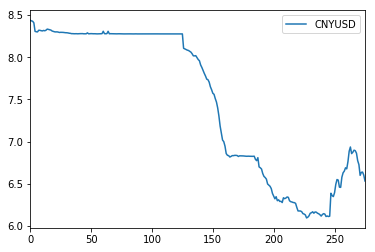

In [36]:
er.plot()
plt.show()

**In-class exercise:** How do we put date on the x-axis?

What do you see in this plot? Does anything appear strange?

> Check: A brief history of the Renminbi exchange rate regime.

The Renminbi exchange rate was fixed against the US dollar, with several revaluations in history, until...?

As there were little variability for us to explore (and, clearly, no room for the exchange rate to be moved by economic fundamentals) before the exchange rate reform, we will focus on the "managed floating era" by using data after July 2005.

In [2]:
erf = pd.read_csv('https://github.com/QuantEcon/ShenzhenWinterCamp/raw/master/Jiao%20Shi/ER_predict.csv')
erf.head()

Date  CNYUSD  RMB_REER  CHN PMI  USA PMI       CHN M1     USA M1  \
0  2005-07  8.1062     85.01     51.1     52.8   97,700.00   1,365.00    
1  2005-08  8.0998     85.05     52.6     52.4   99,400.00   1,376.50    
2  2005-09  8.0920     85.29     55.1     56.8  101,000.00   1,363.10    
3  2005-10  8.0845     86.39     54.1     57.2  101,800.00   1,365.10    
4  2005-11  8.0804     87.75     54.1     56.7  104,100.00   1,373.20    

        CHN M2     USA M2  CHN CPI inflation  USA CPI inflation  CHN_IBR  \
0  277,000.00   6,498.40                 1.8                3.2   1.1395   
1  281,300.00   6,522.50                 1.3                3.6   1.1774   
2  287,000.00   6,555.00                 0.9                4.7   1.1675   
3  287,600.00   6,582.30                 1.2                4.3   1.2442   
4  292,400.00   6,623.00                 1.3                3.5   1.2049   

   US_FFR  
0    3.36  
1    3.30  
2    3.57  
3    3.73  
4    3.99

## Regression: testing the UIP (interest differential) model

The UIP model tells us that the expected change in the exchange rate is determined by the interest differential. 

Here we regress the change in exchange rate on the fundamentals.

This is an *estimation* of our exchange rate model. Later, we will use estimated model to make a *forecast* of the change in the exchange rate one period ahead.

**First we add several columns to the dataframe to create series of dependent and independent variables.**

Our dependent variable is not the *level* of exchange rate but *change* in the exchange rate.

In [3]:
# compute the change in the exchange rate: take log and first difference to compute depreciation (dep)
erf['lner'] = np.log(erf[['CNYUSD']])
erf['dep'] = 100*erf['lner'].diff(periods = 1)

In [4]:
# Create a new column to reindex depreciation - why?
erf['dep_1'] = 0
size_sample = 149

for i in range(size_sample):
    erf.loc[i,'dep_1'] = erf.loc[i+1,'dep']
    
erf.loc[size_sample,'dep_1'] = erf.loc[0,'dep']

Next we compute the independent variable: interest differential across US and China.

In [5]:
erf['int_diff'] = erf['CHN_IBR'] - erf['US_FFR']

Let's see if exchange rate depreciation is correlated with the interest differential by plotting them in a graph

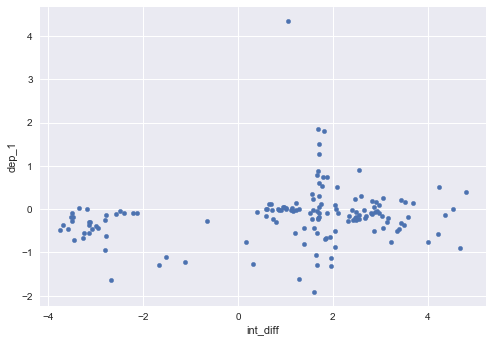

In [6]:
plt.style.use('seaborn')

erf.plot(x='int_diff', y='dep_1', kind='scatter')
plt.show()

The relationship does not appear clear from a glance at the data.

Let's do the regression.

In [7]:
erf['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=erf['dep_1'], exog=erf[['const', 'int_diff']], missing='drop')
results = reg_int.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  dep_1   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.998
Date:                Wed, 07 Feb 2018   Prob (F-statistic):             0.0269
Time:                        19:47:05   Log-Likelihood:                -148.45
No. Observations:                 149   AIC:                             300.9
Df Residuals:                     147   BIC:                             306.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1985      0.059     -3.355      0.0

** Interpretation of the Results **:
1. Do the sign and the magnitude of the parameters fit your intuition?
2. How much variations in the exchange rate can interest rate differential account for?

> **In-class exercise:** Run the regression of the Taylor-rule model and interpret the results. Are the signs and magnitude of the coefficients consistent with theory? Does the Taylor-rule model have better in-sample explanatory power than the UIP model?

## Rolling-window regressions and forecasts

Next we move to **out-of-sample** forecast. We use the **rolling window forecasting**, which means that we re-estimate parameters of the model using a window of recent data before using the estimated model to make a forecast of the exchange rate.

Regarding the size of the estimation sample, we face a trade-off:
* Shorter estimation window allows parameters to adapt more quickly to structural change
* Longer estimation window allows more efficient estimation of the parameters

Here's how we proceed:
1. We use 60 periods (5 years) of data to train the model.

2. Then we use the estimated model to make *one* single prediction on the change in exchange rate in the next period.

3. We examine how good the forecast is by checking how far away the forecast is from the realized (actual) value of exchange rate depreciation.



### An illustrative single regression

First let's do a single regression to illustrate the idea, using the UIP model as the example.

In [8]:
# regression with 60 data points and make a forecast on exchange rate in period 61

# Regression with the first subsample
size_subsample = 60

reg_intsub = sm.OLS(endog=erf.loc[0:size_subsample - 1,'dep_1'], exog=erf.loc[erf.index[0:size_subsample],['const', 'int_diff']], missing='drop')
results_sub = reg_intsub.fit()
print(results_sub.summary())


                            OLS Regression Results                            
Dep. Variable:                  dep_1   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     8.054
Date:                Wed, 07 Feb 2018   Prob (F-statistic):            0.00625
Time:                        00:37:35   Log-Likelihood:                -24.877
No. Observations:                  60   AIC:                             53.75
Df Residuals:                      58   BIC:                             57.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2226      0.055     -4.039      0.0

In [9]:
# Make a forecast and compute forecast error
error = results_sub.predict(exog = [1, erf.loc[60,'int_diff']]) - erf.loc[60, 'dep_1']
error

array([-0.60304797])

### The rolling-window regression and forecasts



In [8]:
# Now we do it recursively
size_sample = 149
size_subsample = 60

# How many regressions can we run? How many forecast errors can we compute?
fcst_int = np.zeros(size_sample - size_subsample)
fcst_error_int = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    reg_intsub = sm.OLS(endog=erf.loc[i:size_subsample-1+i,'dep_1'], exog=erf.loc[erf.index[i:size_subsample+i],['const', 'int_diff']], missing='drop')
    results_sub = reg_intsub.fit()
    fcst_int[i] = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']])
    error = fcst_int[i] - erf.loc[size_subsample+i, 'dep_1']
    fcst_error_int[i] = error
    
fcst_error_int


array([ -6.03047966e-01,   1.51083664e+00,   5.57896386e-02,
         6.56219475e-02,   6.37607069e-01,   3.61449877e-01,
         8.86266893e-02,   1.91292205e-01,   7.05824529e-01,
         4.52660067e-03,   3.58457592e-02,   3.03892794e-01,
         8.81193620e-01,   3.07847358e-01,   3.21433537e-01,
        -5.02365855e-01,   5.82336362e-01,  -3.76417628e-01,
         1.53376696e-01,  -2.35806230e-01,   3.21752360e-02,
        -1.10211390e+00,   9.65425141e-03,  -3.55746873e-01,
        -2.70614868e-01,  -8.30902236e-02,   4.35713639e-01,
         1.79865897e-01,  -4.00024530e-02,  -1.01304056e-01,
        -1.50434637e-01,  -2.86282568e-02,   6.01641476e-01,
         4.68346583e-01,  -1.97876409e-01,  -3.03293611e-01,
        -1.40875051e-01,   1.49347081e-01,  -1.17518656e-01,
        -4.37213140e-02,   3.36139474e-01,  -3.81699089e-01,
        -4.80130435e-01,  -7.29251485e-01,  -2.70410203e-01,
        -3.59630143e-01,   1.00242488e-01,  -4.13474804e-01,
        -1.18771445e-01,

Now we do the same to obtain forecast errors made by the Taylor-rule model:

In [9]:
# Taylor-Rule model

# inflation differential
erf['pi_diff'] = erf['CHN CPI inflation'] - erf['USA CPI inflation']

fcst_tr = np.zeros(size_sample - size_subsample)
fcst_error_tr = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    # Create a column to store the output gap difference and update it in each loop
    y_chn = erf['CHN PMI'] - np.mean(erf.loc[i:size_subsample-1+i, 'CHN PMI'])
    y_us = erf['USA PMI'] - np.mean(erf.loc[i:size_subsample-1+i, 'USA PMI'])
    erf['y_diff'] = y_chn - y_us
    
    reg_trsub = sm.OLS(endog=erf.loc[i:size_subsample-1+i,'dep_1'], exog=erf.loc[erf.index[i:size_subsample+i],['const', 'pi_diff','y_diff']], missing='drop')
    results_sub = reg_trsub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_tr[i] = results_sub.predict(exog = [erf.loc[size_subsample+i,['const', 'pi_diff','y_diff']]])
    error = results_sub.predict(exog = [erf.loc[size_subsample+i,['const', 'pi_diff','y_diff']]]) - erf.loc[size_subsample+i, 'dep_1']
    fcst_error_tr[i] = error
    
fcst_error_tr

array([ -1.05095393e+00,   1.16143051e+00,  -4.16715632e-01,
        -4.04337393e-01,   1.29924580e-01,  -8.38052344e-02,
        -3.97134600e-01,  -2.34109735e-01,   3.97747782e-01,
        -2.22560594e-01,  -2.30657672e-01,  -7.00384452e-02,
         3.68940775e-01,   2.21812553e-02,   4.87509038e-02,
        -8.16626142e-01,   5.56689743e-01,  -4.15553725e-01,
        -1.31036170e-02,  -1.47620344e-01,   2.54748589e-02,
        -1.15024160e+00,  -6.34728029e-02,  -2.12200638e-01,
        -2.79467162e-01,   2.54705307e-02,   6.95453414e-01,
         2.59444741e-01,  -1.56460469e-02,  -7.15394555e-02,
        -6.72710502e-02,  -6.40390355e-02,   6.55060213e-01,
         4.39055876e-01,  -1.34530275e-01,  -1.83583428e-01,
        -4.70352714e-02,   1.50251573e-01,  -2.09556604e-01,
        -1.68967373e-01,   2.94103820e-01,  -3.44601385e-01,
        -4.36920665e-01,  -6.59894816e-01,  -2.43987467e-01,
        -2.07936013e-01,   1.85981205e-01,  -3.22188032e-01,
        -4.49700997e-02,

Clearly, from period to period, each model can over-predict or under-predict the change in the exchange rates.

To get a sense of how well the model has done in general, we compute the **root mean squared error (RMSE)** for each model.
> As the name suggests, this involves taking the square of each prediction error, take the mean of the squared errors, and then take the square root.

Note that this means that we use a *symmetric* criterion: under-prediction is as bad as over-prediction. 

In [12]:
# compute RMSE for the interest differential model
rmse_int = np.sqrt(np.mean(fcst_error_int**2))
rmse_int

0.80592948629223393

In [13]:
# Compute RMSE for the Taylor rule model
rmse_tr = np.sqrt(np.mean(fcst_error_tr**2))
rmse_tr

0.7710978433653588

What's the forecast errors of the random walk model?

In [14]:
# compute RMSE for the random walk model
rmse_rw = np.sqrt(np.mean(erf.loc[size_subsample: size_sample-1, 'dep_1']**2))
rmse_rw

0.78435646614511745

Judging by the RMSE, which model is the best? Do the macro fundamentals-based models "beat" the random walk model?

** A look at how the model mis-forecasts**

Finally, let's graph the forecasted and actual depreciation to see when are the periods the Taylor Rule model did worst.

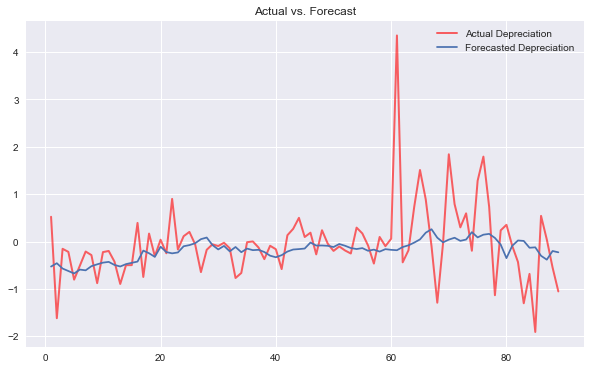

In [15]:
erf_d = erf.set_index('Date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(89)
x = x.cumsum()

y = erf.loc[size_subsample+1: size_sample, 'dep']
ax.plot(x, y, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

y = fcst_tr
ax.plot(x, y, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 



plt.show()

### Futher Reading: Evaluating Model's Predictive Power

We compared the root mean squared error (RMSE) produced by each model and used it as the criterion to judge model's predictive power.

How do we know if one model *significantly* outperforms another in forecasting? We use test statistics. Two commonly used tests in the literature are:

* Diebold and Mariano (1995) and West (1996) test (henceforth DMW test)
* Clark and West (2006) test (henceforth CW test)

The DMW test is used for non-nested competing models, and the CW test is used for nested models.
> "Nested" means one model can be written as a special case of another model.
> For example, the random walk model is a special case of the models based on economic fundamentals. Why?

Understanding these statistics is beyond the scope of this lecture, but check [this notes](http://statweb.stanford.edu/~ckirby/ted/conference/Roberto%20Mariano.pdf) if you are interested.

### Discussion: How important is forecastability?

> Is a model discredited if it fails to make predictions out-of-sample?


### Further Reading: Are Exchange Rates *Supposed to be* Forecastable?



________________________________________________

## Homework

Note: For this homework, you should form pairs of groups. Each group should do the homework independently. But after the homework is done, you should get together with your partner group to check if your answers are the same. If not, find out why and make necessary correction. In this way, each group is doing an independent replication of the work of another group. Comparing your results will reveal errors that are so very common in the early stage of doing empirical research.

### Question I

Comparing root mean squared errors is not the only criterion to judge the goodness of exchange rate models. Some argue that in practice, it is more important that the forecasted direction of change in the exchange rate is correct. (See Engel (1994)) That is to say, if exchange rate depreciated 1% in a given period, the forecast that it would depreciates 4% is better than the forecast that it would appreciate 1%, even though the later forecast is closer to the actual change in magnitude. Use the percentage of correct directional forecast as the criterion to re-examine the UIP model, the Taylor Rule model, and the random walk (with drift) model. Which model performs best in terms of producing the correct direction of change? Does any model beat the random walk model?

**Answer to Q1**

*Note*: I assume that you have run the codes above. 

The random walk with drift model is a model that would predict:

$$E_ts_{t+1}-s_t = \alpha$$

where $\alpha$ is a non-zero constant.

We will first do the rolling-window estimation of the random walk with drift model.

In [10]:
# rolling regression - random walk with drift

fcst_rw = np.zeros(size_sample - size_subsample)
fcst_error_rw = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    reg_rwsub = sm.OLS(endog=erf.loc[i:size_subsample-1+i,'dep_1'], exog=erf.loc[erf.index[i:size_subsample+i],['const']], missing='drop')
    results_sub = reg_rwsub.fit()
    fcst = results_sub.predict(exog = [1])
    fcst_rw[i] = fcst
    fcst_error_rw[i] = fcst - erf.loc[size_subsample+i, 'dep_1']
    
fcst_rw

array([-0.29898306, -0.28895639, -0.31434038, -0.31535867, -0.31815402,
       -0.32945854, -0.3359934 , -0.33551773, -0.33520436, -0.349756  ,
       -0.35395678, -0.3524467 , -0.35484236, -0.36670473, -0.36456208,
       -0.36664192, -0.35254434, -0.35757669, -0.34812407, -0.34542478,
       -0.34334598, -0.34128568, -0.3143589 , -0.3094857 , -0.29844263,
       -0.2921874 , -0.28217583, -0.28367753, -0.2710093 , -0.25043149,
       -0.22457819, -0.2064597 , -0.18836643, -0.19673367, -0.19514193,
       -0.17411391, -0.169147  , -0.17023103, -0.17247225, -0.17579621,
       -0.18073224, -0.1903625 , -0.18897864, -0.18448306, -0.17565775,
       -0.17140049, -0.17009701, -0.17449259, -0.170613  , -0.17110147,
       -0.17386624, -0.17538119, -0.1783101 , -0.18277069, -0.17758219,
       -0.17470866, -0.17599969, -0.18375107, -0.18255845, -0.1751128 ,
       -0.17022482, -0.10640137, -0.08673156, -0.0872623 , -0.07140817,
       -0.03281011, -0.00951246, -0.00762173, -0.02437769, -0.01

Note that if the code is correct, then the forecast of the random walk with drift model is simply the average depreciation in the subsample.

Next, we compute the percentage of correct directional forecasts.

In [35]:
pct_rw = ((erf.loc[size_subsample:size_sample-1, 'dep_1']*fcst_rw >= 0 ).sum())/len(fcst_error_int)

print("The random walk with drift model correctly predicts the direction of depreciation", pct_rw*100,  "% of time.")

The random walk with drift model correctly predicts the direction of depreciation 64.0449438202 % of time.


In [30]:
pct_int = ((erf.loc[size_subsample:size_sample-1, 'dep_1']*fcst_int >= 0 ).sum())/len(fcst_error_int)
pct_tr = ((erf.loc[size_subsample:size_sample-1, 'dep_1']*fcst_tr >= 0 ).sum())/len(fcst_error_int)

print("The UIP model correctly predicts the direction of depreciation", pct_int*100,  "% of time.")
print("The Taylor rule model correctly predicts the direction of depreciation", pct_tr*100,  "% of time.")

The UIP model correctly predicts the direction of depreciation 61.797752809 % of time.
The Taylor rule model correctly predicts the direction of depreciation 64.0449438202 % of time.


It happens that the random walk with drift model makes the same number of correct directional predictions as the Taylor Rule model.

Note that the random walk (without drift) model implies that the correct percentage of prediction would be 50%. In this sense, the random walk with drift model in fact beats the random walk model judging by this particular criterion.

Cerra and Saxena (2010) argues that this is because the random walk with drift model can capture some pattern in macro fundementals.

If you are curious, you'd probably do the following to check if the random walk with drift model would beat the random walk without drift model judging by RMSE:

In [37]:
rmse_rwd = np.sqrt(np.mean(fcst_error_rw**2))
print(rmse_rwd)
rmse_rwd <= rmse_rw

0.790697172505


False

Interestingly, the "drift" helps to predict the direction of the exchange rate, but it does not help to predict the magnitude of change.

### Question II

Engel and West (2005) builds a Taylor Rule model in which one of the countries sets monetary policy rate taking into consideration the level of real effective exchange rate (REER). The idea is that the country may be heavily externally dependent, and the monetary authority cares about the relative price of its exports. Assume that the (trade weighted) real effective exchange rate is a policy concern for the Chinese central bank. Re-estimate the Taylor rule model assuming that:
  * the US central bank sets interest rate targeting inflation and output gap as before
  * the Chinese central bank targets REER in addition

1.	Check a credible online source for the definition of REER.
2.	Estimate the Taylor Rule model with REER using Chinese data. What’s the sign of the coefficient of REER? Is it significant? Is the sign consistent with your intuition?
3.	Re-do the out-of-sample forecast using Taylor Rule model with REER. Does the model produce smaller or larger RMSE than the original Taylor Rule model?

** Answer to QII **

*Part 1.* In short, the real effective exchange rate is a weighted real exchange rate that measures the relative price of a country's goods compared with a basket of other countries'. In practice, how the weights are determined depends on the intended use of the index. Here we use the trade-share-weighted index.

*Part 2.* The Chinese and US monetary policy rules can be written as, respectively:

$$ i_t = \rho_{\pi}\pi_t + \rho_yy_t + \rho_eREER_t + \nu_t $$

If the monetary authority cares about the relative price of its export, it should try to loose monetary policy to alleviate the appreciation pressure when its currency gains value. Suggesting that $\rho_e$ should be *negative*.

$$ i_t^{*} = \rho_{\pi}\pi_t^* + \rho_yy_t^*  + \nu_t^* $$

Substitute into the UIP condition and re-arrange to get:

$$ E_{t}(s_{t+1}-s_{t})=\alpha+\beta_1(\pi_{t}-\pi_{t}^{*})+\beta_2(y_{t}-y_{t}^{*})+\beta_3REER_t + \epsilon_t $$

The last equation suggests that we should re-estimate the Taylor-Rule model with the REER as an additional independent variable.

Let's estimate the full model to see if the coefficient makes sense.

In [14]:
# in-sample estimation

reg_tre = sm.OLS(endog=erf['dep_1'], exog=erf[['const', 'pi_diff','y_diff', 'RMB_REER']], missing='drop')
results = reg_tre.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  dep_1   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     9.796
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           6.33e-06
Time:                        23:38:26   Log-Likelihood:                -137.20
No. Observations:                 149   AIC:                             282.4
Df Residuals:                     145   BIC:                             294.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2165      0.432     -5.136      0.0

We can see that the coefficient of the RMB real effective exchange rate was significantly positive, suggesting that monetary policy rate seems to be high precisely when the RMB was appreciating in real terms. This is counter-intuitve. - Or is it? Can you think of an explanation for this positive *correlation*?

*Part 3.* Here's the rolling-window regression with the REER:

In [12]:
# Taylor-rule model with REER
fcst_tre = np.zeros(size_sample - size_subsample) #tre = taylor rule with exchange rate
fcst_error_tre = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    # y_diff column should have been created before so we quote it out
    # y_chn = erf['CHN PMI'] - np.mean(erf.loc[i:size_subsample-1+i, 'CHN PMI'])
    # y_us = erf['USA PMI'] - np.mean(erf.loc[i:size_subsample-1+i, 'USA PMI'])
    # erf['y_diff'] = y_chn - y_us
    
    reg_tresub = sm.OLS(endog=erf.loc[i:size_subsample-1+i,'dep_1'], exog=erf.loc[erf.index[i:size_subsample+i],['const', 'pi_diff','y_diff', 'RMB_REER']], missing='drop')
    results_sub = reg_tresub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_tre[i] = results_sub.predict(exog = [erf.loc[size_subsample+i,['const', 'pi_diff','y_diff', 'RMB_REER']]])
    error = results_sub.predict(exog = [erf.loc[size_subsample+i,['const', 'pi_diff','y_diff', 'RMB_REER']]]) - erf.loc[size_subsample+i, 'dep_1']
    fcst_error_tre[i] = error
    
fcst_error_tre

array([-0.72607244,  1.45856886, -0.22101211, -0.26704785,  0.29947521,
        0.12987519, -0.18076062, -0.0091208 ,  0.55242062, -0.1066666 ,
       -0.10993902,  0.04342912,  0.49135752,  0.15895563,  0.2411531 ,
       -0.61072717,  0.76329439, -0.20334998,  0.25086308,  0.02636938,
        0.22954276, -0.95964872,  0.15910484, -0.03000177, -0.10732494,
        0.19187836,  0.81446051,  0.37410908,  0.18274428,  0.11059769,
        0.06526864,  0.07032509,  0.77178126,  0.52779668, -0.09503696,
       -0.18808634, -0.03701628,  0.17039096, -0.21631756, -0.15608758,
        0.32006736, -0.33935046, -0.40452801, -0.59852942, -0.16760522,
       -0.16103879,  0.2288252 , -0.28464814, -0.00860237,  0.11952526,
        0.12398937,  0.16532904,  0.20183464, -0.32698434, -0.13100998,
        0.13409223,  0.56006739, -0.11999241,  0.11307533, -0.08005171,
       -4.34611624,  1.02734872,  0.62804561, -0.37643829, -1.0317638 ,
       -0.283852  ,  0.69725412,  1.80514736,  0.33123073, -1.58

In [13]:
rmse_tre = np.sqrt(np.mean(fcst_error_tre**2))
rmse_tre

0.76057185980014974

Thus the model in which Chinese government targets the REER produces smaller RMSE than the standard Taylor Rule model.

### Question III

In the literature, it is well known that the best model for one country may not be the best for another. Collect data for another pair of countries and re-examine the performance of the UIP model, the Taylor Rule model, and the random walk model using the RMSE as the criterion.

As a first step, please make sure that you can find the required data at monthly frequency for at least 10 years for your choice of exchange rate. Please then go to our WeChat group and *post your choice of exchange rate* so that later groups will not accidentally pick the same exchange rate. It is your responsibility to make sure that your choice of country-pair has not already been claimed by another pair of groups. *Partner groups should use the same bilateral exchange rate*.

**Answer to QIII**

Omitted. 

### References

Cerra, V. and S.C. Saxena (2010), The Monetary Model Strikes Back: Evidence from the World,Journal of International Economics 81, 184-196.

Clark, T. E., & West, K. D. (2007). Approximately normal tests for equal predictive accuracy in nested models. Journal of econometrics, 138(1), 291-311.

Diebold, Francis X., and Robert S. Mariano. "Comparing predictive accuracy." Journal of Business & economic statistics 20.1 (2002): 134-144.

Engel, C. (1994). Can the Markov switching model forecast exchange rates?. Journal of International Economics, 36(1-2), 151-165.

Meese, R. A., & Rogoff, K. (1983). Empirical exchange rate models of the seventies: Do they fit out of sample?. Journal of international economics, 14(1-2), 3-24.

Rossi, B. (2013). Exchange rate predictability. Journal of economic literature, 51(4), 1063-1119.

West, K. D. (1996). Asymptotic inference about predictive ability. Econometrica: Journal of the Econometric Society, 1067-1084.